# Modelos de Regresión Lineal
La regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras.

$ Y_e = α + β * x $

Si somos capaces de calcular *α* y *β* que satisfaga la condición, entonces tenemos una ecuación capaz de predecir los valores de Y (valores de salida) de las variables de entrada X.

## Modelo con Datos simulados
* Regresión lineal: $ Y_e = α + β * x $
    * X : 100 valores distribuídos según una $ N(1.5, 2.5) $
    * $ Y = 5 + 1,9 * x + ε $
* Componente de error: $ Y = α + β * x + ε $
* ε estará distribuído según una $ N(0, 0.8) $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# N(1.5, 2.5)
x = 1.5 + 2.5 * np.random.randn(100)
# Error: N(0, 0.8)
e = 0 + 0.8 * np.random.randn(100)

In [3]:
# Funciones
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + e

In [4]:
# Pasar a lista
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [5]:
# Crear dataframe
data = pd.DataFrame({
    "x": x_list,
    "y": y_act_list,
    "y_pred": y_pred_list,
})

In [6]:
data.head()

,x,y,y_pred
0,-0.683532,3.138522,3.701290
1,1.878343,8.496090,8.568853
2,2.369284,9.816271,9.501640
3,1.906205,8.375383,8.621790
4,2.979314,10.450046,10.660696


In [7]:
# Promedio de valores actuales
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

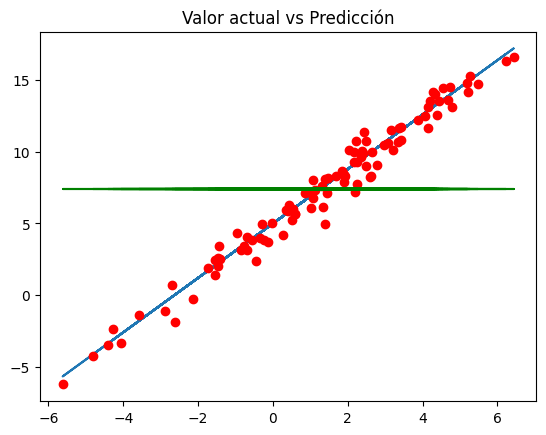

In [32]:
%matplotlib inline
plt.plot(x, y_pred)  # predicción (linea azul)
plt.plot(x, y_act, "ro")  # valores actuales
plt.plot(x, y_mean, "g")  # valores medios
plt.title("Valor actual vs Predicción")

### Representaciones
* **SST** *(Suma de los cuadrados totales)* representa la distancia entre el dato observado y la media.
* **SSD** *(Suma de los cuadrados de la diferencia)* representa la distancia entre el dato observado y la predicción.
* **SSR** *(Suma de los cuadrados de la regresión)* representa la distancia entre la media y la predicción.

## ¿Como es la predicción de buena?
* SST : Variabilidad de los datos con respecto de su media    SST = SSD + SSR
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* $ R^2 = SSR / SST $, coeficiente de determinación entre 0 y 1. Mientras más cerca esté de 1, mejor es el modelo.

In [9]:
# Promedio de los datos actuales
y_m = np.mean(y_act)

data["SSR"] = (data["y_pred"] - y_m)**2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - y_m)**2

In [10]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-0.683532,3.138522,3.701290,13.775398,0.316707,18.269555
1,1.878343,8.496090,8.568853,1.336429,0.005294,1.173490
2,2.369284,9.816271,9.501640,4.363199,0.098993,5.776614
3,1.906205,8.375383,8.621790,1.461626,0.060716,0.926542
4,2.979314,10.450046,10.660696,10.548747,0.044373,9.224791


In [11]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [12]:
SSR

2364.9748960923826

In [13]:
# Valores que no pueden ser explicados por el modelo
SSD

65.91865840554108

In [14]:
# Valores totales
SST

2424.8199544196805

In [15]:
SSR+SSD

2430.8935544979236

In [16]:
# R2 = 0.97 sugiere que la predicción es bastante acertada
R2 = SSR/SST
R2

0.9753197930352646

(array([ 3.,  3.,  4.,  9., 12., 18., 24.,  9., 13.,  5.]),
 array([-13.09079514, -10.80141938,  -8.51204363,  -6.22266787,
         -3.93329211,  -1.64391636,   0.6454594 ,   2.93483516,
          5.22421092,   7.51358667,   9.80296243]),
 <BarContainer object of 10 artists>)

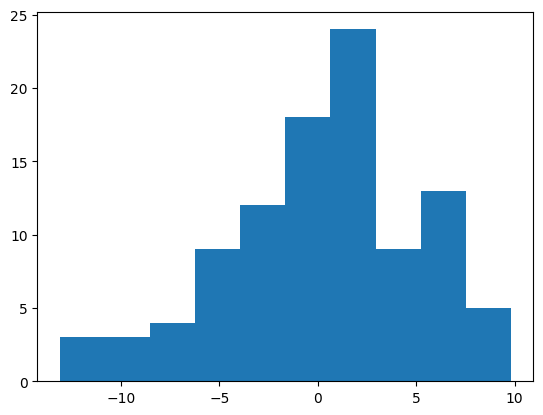

In [17]:
# SSD sin el cuadrado se distribuye según la Normal
plt.hist(data["y_pred"] - np.mean(y_act))

## Obteniendo la Recta de Regresión
* $ y = α + β \cdot x $

* $ β = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $
* $ α = \bar{y} - β \cdot \bar{x} $

In [18]:
# Promedio de x y promedio de y
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])

In [34]:
# Calculo de β
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [21]:
# Calculo de α
alpha = y_mean - beta * x_mean

In [22]:
alpha, beta

(4.8544925947632045, 1.8992832314616228)

In [23]:
# Calculo del modelo lineal obtenido por regresion = y
data["y_model"] = alpha + beta * data["x"]

In [24]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.683532,3.138522,3.701290,13.775398,0.316707,18.269555,8.679047,4.123027,3.556273
1,1.878343,8.496090,8.568853,1.336429,0.005294,1.173490,0.575601,0.282334,8.421999
2,2.369284,9.816271,9.501640,4.363199,0.098993,5.776614,2.457036,1.045080,9.354434
3,1.906205,8.375383,8.621790,1.461626,0.060716,0.926542,0.538282,0.312719,8.474916
4,2.979314,10.450046,10.660696,10.548747,0.044373,9.224791,4.957742,2.664473,10.513053


### Análisis de Modelo de regresión con la recta

In [39]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

SSR, SSD, SST

(2361.047062939131, 63.77289148054722, 2424.8199544196805)

In [40]:
R2 = SSR/SST
R2

0.9736999477572298

Text(0.5, 1.0, 'Valor actual vs Predicción')

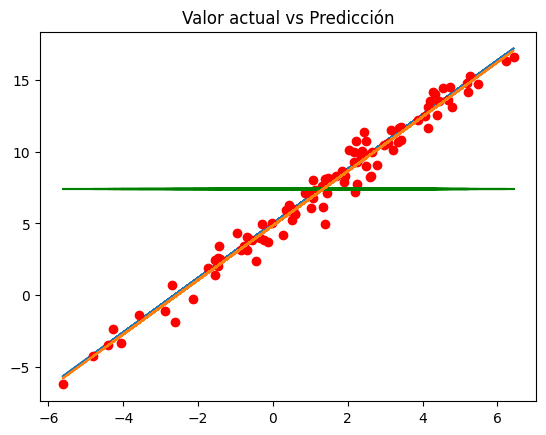

In [41]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"], data["y_pred"])  # Prediccion (linea azul)
plt.plot(data["x"], data["y"], "ro")  # Valores dados
plt.plot(data["x"], y_mean, "g")  # Valores medios
plt.plot(data["x"], data["y_model"]) # Prediccion (actual)
plt.title("Valor actual vs Predicción")

## Error Estandar de los Residuos (RSE)
Es la desviación estándar del término del error (desviación de la parte de datos que el modelo no es capaz de explicar por falta de información o más datos adicionales)

* En el caso de una regresión lineal simple

$ RSE = \sqrt{ \frac{ \sum(y_i - y(x_i))^2 }{n - 2} } = \sqrt{ \frac{SSD}{n-2} }$

* En el caso de una regresión lineal múltiple (k = número de variables predictoras)

$ RSE = \sqrt{ \frac{SSD}{n - k - 1} } $

In [29]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.820145945234818

In [30]:
aux = np.mean(data["y"])

In [31]:
RSE/aux

0.11063897354278365